In [1]:
# import Data Manipulation Libraries
import numpy as np
import pandas as pd
# Import Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns 
# Import Filter Warnings Libraries
import warnings
warnings.filterwarnings('ignore')

#Import Logging Libraries
import logging
logging.basicConfig(level=logging.INFO,
                    filemode='w',
                    filename='model.log',
                    format='%(asctime)s - %(levelname)s - %(message)s',force=True)


# Import Stats Scipy Library
import scipy.stats as stats

In [2]:
#Data Import Using Pandas Function

url= 'https://raw.githubusercontent.com/Saimehtre18/Heart_Disease_Prediction_Model/refs/heads/main/heart-disease.csv'

df =pd.read_csv(url)

df.sample(frac = 1) #Shuffle dataset

print(df.sample(frac = 1))

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
181   65    0   0       150   225    0        0      114      0      1.0   
208   49    1   2       120   188    0        1      139      0      2.0   
39    65    0   2       160   360    0        0      151      0      0.8   
268   54    1   0       122   286    0        0      116      1      3.2   
232   55    1   0       160   289    0        0      145      1      0.8   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
64    58    1   2       140   211    1        0      165      0      0.0   
209   59    1   0       140   177    0        1      162      1      0.0   
70    54    1   2       120   258    0        0      147      0      0.4   
201   60    1   0       125   258    0        0      141      1      2.8   
66    51    1   2       100   222    0        1      143      1      1.2   

     slope  ca  thal  target  
181      1   3     3       0  
208      1   3     3     

In [3]:
logging.info('Dataset Uploaded Successfully ............')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
Numerical_Data =df.select_dtypes(exclude='object')

In [6]:
Numerical_Data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [7]:
from collections import OrderedDict

stats= []

for i in Numerical_Data:
    
    numerical_stats = OrderedDict({
        'Feature':i,
        'Maximum':Numerical_Data[i].max(),
        'Minimum':Numerical_Data[i].min(),
        'Median':Numerical_Data[i].median(),
        'Mean':Numerical_Data[i].mean(),
        'Standard Deviation':Numerical_Data[i].std(),
        'Variance':Numerical_Data[i].var(),
        '25%':Numerical_Data[i].quantile(0.25),
        '75%':Numerical_Data[i].quantile(0.75),
        'Kurtosis':Numerical_Data[i].kurt(),
        'Skewness':Numerical_Data[i].skew()
    })
    
    stats.append(numerical_stats)
    
    report=pd.DataFrame(stats)
    
report

,Feature,Maximum,Minimum,Median,Mean,Standard Deviation,Variance,25%,75%,Kurtosis,Skewness
0,age,77.0,29.0,55.0,54.366337,9.082101,82.484558,47.5,61.0,-0.542167,-0.202463
1,sex,1.0,0.0,1.0,0.683168,0.466011,0.217166,0.0,1.0,-1.382961,-0.791335
2,cp,3.0,0.0,1.0,0.966997,1.032052,1.065132,0.0,2.0,-1.193071,0.484732
3,trestbps,200.0,94.0,130.0,131.623762,17.538143,307.586453,120.0,140.0,0.929054,0.713768
4,chol,564.0,126.0,240.0,246.264026,51.830751,2686.426748,211.0,274.5,4.505423,1.143401
5,fbs,1.0,0.0,0.0,0.148515,0.356198,0.126877,0.0,0.0,1.959678,1.986652
6,restecg,2.0,0.0,1.0,0.528053,0.525860,0.276528,0.0,1.0,-1.362673,0.162522
7,thalach,202.0,71.0,153.0,149.646865,22.905161,524.646406,133.5,166.0,-0.061970,-0.537410
8,exang,1.0,0.0,0.0,0.326733,0.469794,0.220707,0.0,1.0,-1.458317,0.742532
9,oldpeak,6.2,0.0,0.8,1.039604,1.161075,1.348095,0.0,1.6,1.575813,1.269720


In [8]:
logging.info('The Above dataset is Non Normal distributed dataset')

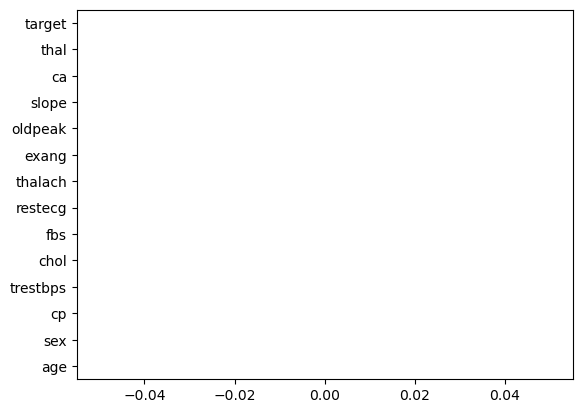

In [9]:
df.isnull().sum().plot(kind='barh')
plt.show()

In [10]:
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

<Axes: >

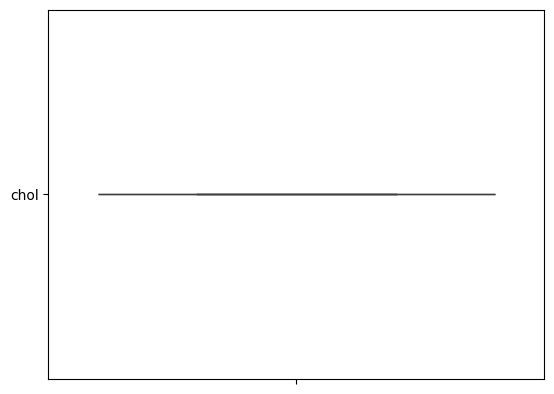

In [11]:
sns.boxplot('chol')

In [17]:
X= df.drop(columns='target')

y=df['target']

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.3,random_state=7)

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train=scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)


In [18]:
from sklearn.linear_model import LogisticRegression

LR=LogisticRegression()

LR.fit(X_train, y_train)

from sklearn.metrics import accuracy_score, classification_report

y_pred=LR.predict(X_test)

accuracy_LR = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy_LR}")


report = classification_report(y_test, y_pred)
print(f"Classification Report:\n{report}")

Accuracy Score: 0.8075117370892019
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.74      0.78        98
           1       0.80      0.86      0.83       115

    accuracy                           0.81       213
   macro avg       0.81      0.80      0.80       213
weighted avg       0.81      0.81      0.81       213



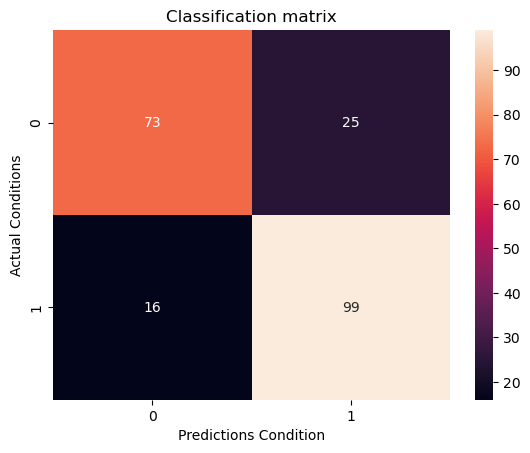

In [20]:
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_test, y_pred),annot=True)
plt.title("Classification matrix")
plt.xlabel("Predictions Condition")
plt.ylabel("Actual Conditions")
plt.show()


## **RANDOM FOREST CLASSIFIER**

In [21]:
from sklearn.ensemble import RandomForestClassifier

RF=RandomForestClassifier()

RF.fit(X_train, y_train)

y_predict_RF=RF.predict(X_test)

accuracy_score_RF=accuracy_score(y_test,y_predict_RF)
accuracy_score_RF

0.8075117370892019

In [23]:
classification_report_RF=classification_report(y_test,y_predict_RF)
print(classification_report_RF)

              precision    recall  f1-score   support

           0       0.82      0.74      0.78        98
           1       0.80      0.86      0.83       115

    accuracy                           0.81       213
   macro avg       0.81      0.80      0.80       213
weighted avg       0.81      0.81      0.81       213



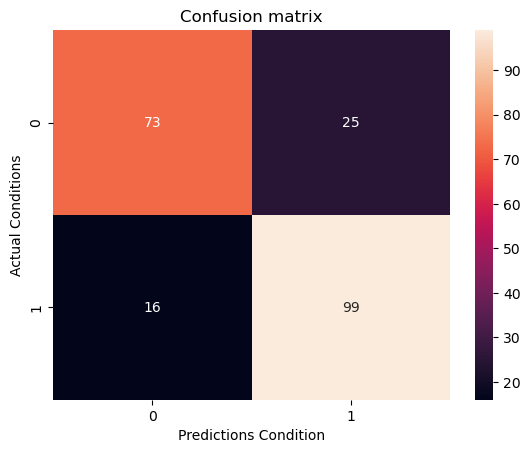

In [25]:
sns.heatmap(confusion_matrix(y_test,y_predict_RF),annot=True)
plt.title('Confusion matrix')
plt.xlabel("Predictions Condition")
plt.ylabel("Actual Conditions")
plt.show()